### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib.colors import ListedColormap


### Importing the data

In [2]:
training_data = np.loadtxt('/home/utk.edu/nnaraya2/phase2/CS_522/synth_tr.txt',skiprows=1)
testing_data = np.loadtxt('/home/utk.edu/nnaraya2/phase2/CS_522/synth_te.txt', skiprows=1)
print('The shape of the training data is ', training_data.shape)
print('The shape of the training data is ', testing_data.shape)

The shape of the training data is  (250, 3)
The shape of the training data is  (1000, 3)


In [3]:
training_data[:2,:]

array([[ 0.05100797,  0.16086164,  0.        ],
       [-0.74807425,  0.08904024,  0.        ]])

In [4]:
testing_data[:2,:]

array([[-0.97099014,  0.42942495,  0.        ],
       [-0.63199703,  0.25195285,  0.        ]])

## Task 1
**(5 pts) Show a scatter plot of the training set of the two classes.**
**From visual inspection, do you think single-modal Gaussian is a good/reasonable model for the pdf?**


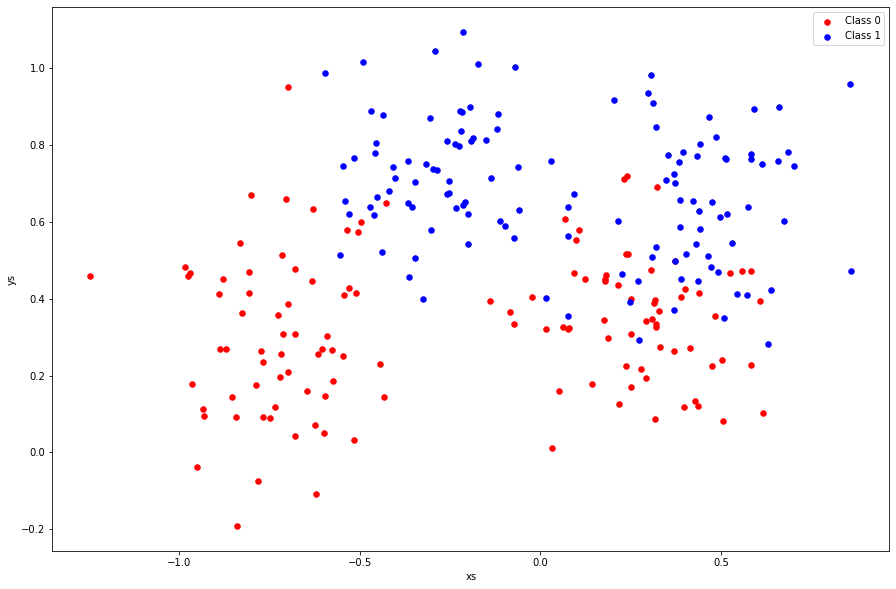

In [9]:
plt.figure(figsize=(15, 10))
# Separate the data into two categories
class_0_data = training_data[training_data[:,-1] == 0]
class_1_data = training_data[training_data[:,-1] == 1]
# Create scatter plots for each category with specific colors
plt.scatter(x=class_0_data[:,0], y=class_0_data[:,1], s=30, c='red', label='Class 0')
plt.scatter(x=class_1_data[:,0], y=class_1_data[:,1], s=30, c='blue', label='Class 1')

# Add a legend
plt.legend()

# Label the plot axes
plt.xlabel('xs')
plt.ylabel('ys')

# Show the plot
plt.show()


**From the above figure, we can see that for each class there are two modes where the data points are concentrated**

**Thus , we can see that a single modal Gaussian is not enough to represent the above data**


  <!-- Two spaces at the end of the previous line -->
  
## Task 2

**(15 pts) Plot a figure with the x-axis showing the different "k" values in kNN and the y-axis showing the overall classification accuracy.**
  <!-- Two spaces at the end of the previous line -->


In [10]:
import numpy as np

class Classifier:
    """
    Base Classifier class that initializes training data.
    
    Attributes:
        data (numpy.ndarray): The training data.
        X_train (numpy.ndarray): Feature data for training.
        y_train (numpy.ndarray): Target labels for training.
        num_of_features (int): Number of features in the data.
        categories (numpy.ndarray): Unique categories in the target labels.
    """
    def __init__(self, data):
        # Validate that data has at least two columns (features and labels)
        if data.shape[1] < 2:
            raise ValueError("Input data must have at least two columns (features and labels).")
        
        self.data = data
        self.X_train = data[:, :-1]  # Extracting feature data
        self.y_train = data[:, -1]  # Extracting target data
        self.num_of_features = self.X_train.shape[1]  # Calculating number of features in the data
        self.y_train = self.y_train.astype(int)  # Ensuring labels are integers
        self.categories = np.unique(self.y_train)  # Finding unique categories


class KNNClassifier(Classifier):
    """
    k-Nearest Neighbors Classifier.
    
    Attributes:
        k (int): Number of neighbors to consider for classification.
    """
    def __init__(self, data, k=3):
        super().__init__(data)
        
        # Validate the value of k
        if k <= 0:
            raise ValueError("k must be greater than 0.")
        
        self.k = k

    def predict(self, x):
        """
        Predict the label for a given input x.
        
        Args:
            x (numpy.ndarray): The input data point.
            
        Returns:
            int: The most common class label among k nearest neighbors.
        """
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
        
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


def classification_accuracy(y_true, y_pred):
    """
    Calculate overall classification accuracy and class-wise accuracy.

    Args:
        y_true (numpy.ndarray): True binary labels (ground truth).
        y_pred (numpy.ndarray): Predicted binary labels.

    Returns:
        dict: Dictionary containing overall and class-wise accuracies.
    """
    # Convert to numpy array for consistency
    y_pred = np.array(y_pred)
    
    # Check if the input arrays have the same shape
    if y_true.shape != y_pred.shape:
        raise ValueError("Input arrays must have the same shape.")
    
    # Calculate overall accuracy
    overall_accuracy = np.mean(y_true == y_pred)
    
    # Calculate class-wise accuracy
    categories = np.unique(y_true).astype(int)
    classwise_accuracies = {}
    for category in categories:
        category_index = y_true == category
        classwise_accuracies[category] = np.mean(y_pred[category_index] == category)
        
    final_accuracy = {'overall_accuracy': overall_accuracy}
    for category in categories:
        final_accuracy[category] = classwise_accuracies[category]

    return final_accuracy


In [11]:
k_accuracy = {}
  # Create an instance once

for k in range(1, 40):
    knn_classifier = KNNClassifier(training_data,k = k)
    
    # Make predictions for the current k
    results = [knn_classifier.predict(row) for row in testing_data[:, :-1]]
    
    # Calculate accuracy
    final_accuracy_results = classification_accuracy(testing_data[:, -1], results)
    k_accuracy[k] = final_accuracy_results['overall_accuracy']

In [18]:
k_accuracy[20]

0.912

Text(0.5, 1.0, ' Classification accuracy vs k values')

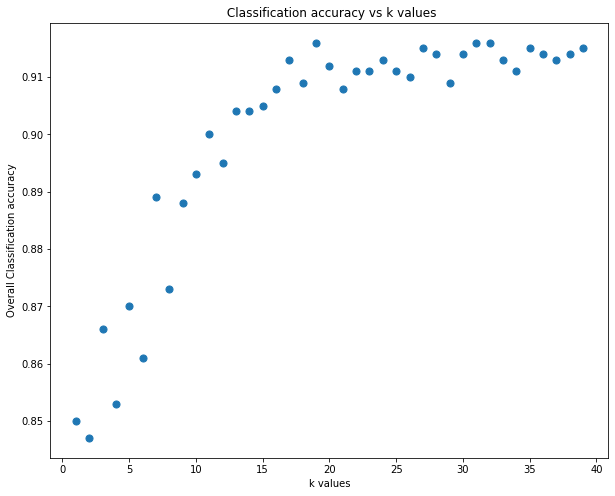

In [16]:
plt.figure(figsize = (10,8))
plt.scatter(k_accuracy.keys(), k_accuracy.values(),s = 50)
plt.xlabel('k values')
plt.ylabel('Overall Classification accuracy')
plt.title(' Classification accuracy vs k values')




**From the graph, we can see that the classification accuracy reaches a plateau at the value of k = 20**

**Therefore, the best value of k is k  = 20**

**The overall classification accuracy at k = 20 is 0.912**

### Task 3

**(50 pts) Assuming equal prior probability, generate a table summarizing the overall classification accuracy, classwise accuracy, and run time of the four supervised learning algorithms, with each row indicating a learning algorithm and each column indicating a performance metric. For kNN, choose the best "k" you obtained from Task 2.**


In [17]:

        
class Discriminant(Classifier):
    """
    A class for discriminant analysis using Gaussian models.

    Attributes:
        data (numpy.ndarray): The input data as a 2D numpy array.
        pp (dict): Dictionary of prior probabilities for each category.
        number_of_categories (numpy.ndarray): Array of unique category labels.
        category_data (dict): Dictionary to store data for each category.
        mu_vector (dict): Dictionary to store mean vectors for each category.
        vcov (dict): Dictionary to store covariance matrices for each category.
        vcov_inv (dict): Dictionary to store inverse covariance matrices for each category.

    Methods:
        min_eucl_dist_classifier(x_vector):
            Classify an input vector using the minimum Euclidean distance classifier.

        gaussian_pdf(x_vector, mu_vector=None, vcov_matrix=None):
            Calculate the Gaussian probability density function for an input vector.

    """

    def __init__(self, data, pp=None):
        """
        Initialize the Discriminant class with input data and optional prior probabilities.

        Args:
            data (numpy.ndarray): The input data as a 2D numpy array.
            pp (dict, optional): Dictionary of prior probabilities for each category. Default is None.

        """
        super().__init__(data)
        self.category_data = {}
        self.mu_vector = {}
        self.vcov = {}
        self.vcov_inv = {}  
        self.pp = {}
        for category in self.categories:
            self.category_data[category] = self.data[self.data[:, -1] == category]
            self.mu_vector[category] = np.mean(self.category_data[category][:, :-1], axis=0).reshape(-1,1)
            self.vcov[category] = np.cov(self.category_data[category][:, :-1], rowvar=False)
            self.vcov_inv[category] = np.linalg.inv(self.vcov[category])
            if pp is None:
                self.pp[category] = 1 / len(self.categories)
            else:
                self.pp[category] = pp[category]
        self.medc_vcov,self.mahdc_vcov = self.var_mat_gen()
                
                
    def var_mat_gen(self):
        vcov_mat = np.zeros((self.num_of_features,self.num_of_features))
        for category in self.categories:
            vcov_mat = vcov_mat + self.vcov[category]
        mah_vcov_mat = vcov_mat / len(self.categories)
        euc_vcov_mat = np.mean(np.diag(vcov_mat)) * np.eye(vcov_mat.shape[0])
        return euc_vcov_mat, mah_vcov_mat

        

    def min_eucl_dist_classifier(self, x_vector):
        x_vector = x_vector.reshape(-1,1)
        """
        Classify an input vector using the minimum Euclidean distance classifier.

        Args:
            x_vector (numpy.ndarray): The input vector to classify.

        """
        g_category = {}
        for category in self.categories:
            g_category[category] = self.gaussian_pdf(x_vector, 
                                                     mu_vector=self.mu_vector[category],
                                                     vcov_matrix=self.medc_vcov) + np.log(self.pp[category])
        
        max_key = max(g_category, key=lambda k: g_category[k])
        return max_key

    def mah_dist_classifier(self, x_vector):
        x_vector = x_vector.reshape(-1,1)
        """
        Classify an input vector using the minimum Mahalanobis distance classifier.

        Args:
            x_vector (numpy.ndarray): The input vector to classify.

        """
        g_category = {}
        for category in self.categories:
            g_category[category] = self.gaussian_pdf(x_vector, 
                                                     mu_vector=self.mu_vector[category],
                                                     vcov_matrix=self.mahdc_vcov) + np.log(self.pp[category])
        
        max_key = max(g_category, key=lambda k: g_category[k])
        return max_key
    
    
    
    def arbitrary_dist_classifier(self, x_vector):
        x_vector = x_vector.reshape(-1,1)
        """
        Classify an input vector using the arbitrary classifier.

        Args:
            x_vector (numpy.ndarray): The input vector to classify.

        """
        g_category = {}
        for category in self.categories:
            g_category[category] = self.gaussian_pdf(x_vector, 
                                                     mu_vector=self.mu_vector[category],
                                                     vcov_matrix=self.vcov[category]) + np.log(self.pp[category])
        
        max_key = max(g_category, key=lambda k: g_category[k])
        return max_key
    
        
    def gaussian_pdf(self, x_vector, mu_vector=None, vcov_matrix=None):
        """
        Calculate the Gaussian probability density function for an input vector.

        Args:
            x_vector (numpy.ndarray): The input vector for which to calculate the probability.
            mu_vector (numpy.ndarray, optional): Mean vector. Default is None (use category mean).
            vcov_matrix (numpy.ndarray, optional): Covariance matrix. Default is None (use category covariance).

        Returns:
            float: The log probability density.

        """
        denominator = ((2 * np.pi) ** (len(mu_vector) / 2)) * np.sqrt(np.linalg.det(vcov_matrix))
        term_in_bracket = -0.5 * np.dot(np.dot((x_vector - mu_vector).T, np.linalg.inv(vcov_matrix)), x_vector - mu_vector)
        prob = (1 / denominator) * np.exp(term_in_bracket)
        return np.log(prob)

    

    
    


### Testing Accuracy

In [19]:
knn20 = KNNClassifier(training_data, k = 20)

In [21]:
discriminant1 = Discriminant(training_data)

In [22]:
classifier_time = {}
classifier_accuracy = {}

classifiers = {
    'MEDC': discriminant1.min_eucl_dist_classifier,
    'MAHDC': discriminant1.mah_dist_classifier,
    'ARBDC': discriminant1.arbitrary_dist_classifier,
    'KNN': knn20.predict,
}

for classifier_name, classifier_func in classifiers.items():
    start_time = int(np.datetime64('now').astype(int).astype(str)[-2:])
    results = [classifier_func(row) for row in testing_data[:,:-1]]
    end_time = int(np.datetime64('now').astype(int).astype(str)[-2:])
    
    classifier_time[classifier_name] = end_time - start_time
    classifier_accuracy[classifier_name] = classification_accuracy(testing_data[:,-1], results)


In [23]:
# Extract performance metrics into NumPy arrays
algorithm_names = list(classifier_accuracy.keys())
metric_names = list(classifier_accuracy['MEDC'].keys())

# Extend the number of columns in performance_data for the time column
num_algorithms = len(algorithm_names)
num_metrics = len(metric_names) + 1  # Adding one for the time column
performance_data = np.zeros((num_algorithms, num_metrics))

# Populate the NumPy arrays with data from the dictionary
for i, algorithm_name in enumerate(algorithm_names):
    for j, metric_name in enumerate(metric_names):
        performance_data[i, j] = classifier_accuracy[algorithm_name][metric_name]

# Extract time values from classifier_time and add them to the time column
time_column_index = num_metrics - 1  # The index of the time column
for i, algorithm_name in enumerate(algorithm_names):
    time_value = classifier_time.get(algorithm_name, 0)  # Get time value, default to 0 if not present
    performance_data[i, time_column_index] = time_value

# Display the performance data in a structured table
print("Performance Metrics:")
header = ["Algorithm"] + metric_names + ["Time (s)"]
separator = "+" + "+".join(["-" * 15] * (num_metrics + 1)) + "+"
print(separator)
print("| {:<10} |".format(header[0]), end="")
for metric_name in header[1:]:
    print(" {:<15} |".format(metric_name), end="")
print("\n" + separator)

for i, algorithm_name in enumerate(algorithm_names):
    print("| {:<10} |".format(algorithm_name), end="")
    for j in range(num_metrics):
        print(" {:<15.3f} |".format(performance_data[i, j]), end="")
    print("\n" + separator)


Performance Metrics:
+---------------+---------------+---------------+---------------+---------------+
| Algorithm  | overall_accuracy | 0               | 1               | Time (s)        |
+---------------+---------------+---------------+---------------+---------------+
| MEDC       | 0.713           | 0.680           | 0.746           | 0.000           |
+---------------+---------------+---------------+---------------+---------------+
| MAHDC      | 0.892           | 0.900           | 0.884           | 0.000           |
+---------------+---------------+---------------+---------------+---------------+
| ARBDC      | 0.898           | 0.908           | 0.888           | 0.000           |
+---------------+---------------+---------------+---------------+---------------+
| KNN        | 0.912           | 0.932           | 0.892           | 2.000           |
+---------------+---------------+---------------+---------------+---------------+


<div style="margin-top: 20px; margin-bottom: 20px;">
    
## Task 4
**(10 pts) Provide a comprehensive discussion (0.5 ~ 1 page) on the results shown in the table, including the effect of using different assumptions of the covariance matrices.**

</div>


Results Discussion

The table presents performance metrics for four different classification algorithms: MEDC (Minimum Euclidean Distance Classifier), MAHDC (Minimum Mahalanobis Distance Classifier), ARBDC (Arbitrary Distance Classifier), and KNN (K-Nearest Neighbors). These algorithms were evaluated using the synthetic dataset, and the table reports their performance in terms of overall accuracy, class-wise accuracy, and execution time.

Overall Accuracy
MEDC achieved an overall accuracy of approximately 0.713. This classifier uses the minimum Euclidean distance and assumes that the features are independent and have same variance. The decision boundary is a hyperplane of 1 dimension as the number of features are 2. It performs reasonably well but may not handle more complex data distributions effectively.

MAHDC outperformed MEDC with an overall accuracy of about 0.892. MAHDC accounts for identical covariance matrices for each class taking into account the covariance between variables. As a result, it can capture variations in data distribution better.

ARBDC yielded an overall accuracy of approximately 0.898. This classifier assumes Gaussian distributions with arbitrary covariance matrices. It performs competitively with MAHDC and demonstrates the importance of allowing for arbitrary covariance structures.

KNN achieved the highest overall accuracy, around 0.912. KNN is a non-parametric method that does not make specific distribution assumptions. It adapts well to various data distributions but might be computationally expensive for large datasets.

Class-Wise Accuracy
Looking at class-wise accuracy (0 and 1), we observe similar trends. MAHDC and ARBDC consistently perform well across both classes, indicating their effectiveness in handling different data distributions within each class. MEDC performs decently but has a lower accuracy for class 1, suggesting that it may struggle with capturing class-specific characteristics. KNN excels in class 0 but slightly lags behind in class 1, highlighting its sensitivity to class imbalance and the choice of k.

Effect of Covariance Matrices
The key difference among these algorithms lies in their treatment of covariance matrices:

MEDC assumes equal and spherical covariance matrices for all classes. While simple, it may not capture the nuances of different class distributions, resulting in suboptimal performance.

MAHDC considers class-specific covariance matrices, allowing for more flexibility. This flexibility improves its performance, especially when class distributions have different shapes or orientations.

ARBDC takes the most flexible approach, assuming arbitrary covariance matrices for each class. This approach performs competitively and showcases the importance of adapting to complex data distributions.

In summary, the choice of covariance matrix assumptions significantly impacts the performance of these classifiers. While MEDC and MAHDC provide reasonable results, ARBDC's ability to adapt to arbitrary covariance structures and KNN's non-parametric nature make them attractive choices for classification tasks, especially when data distribution assumptions are uncertain or complex.

It's important to note that KNN, while achieving the highest overall accuracy, comes with the trade-off of increased computational time, as indicated in the "Time (s)" column. Therefore, the choice of algorithm should consider both accuracy and computational efficiency, depending on the specific requirements of the task and the dataset size.

### Task 5

**(15 pts) Using the synthetic dataset, illustrate the four decision boundaries from the three cases of parametric learning algorithms on the same figure as the scatter plot of the testing dataset. The fourth one should be that from kNN (with the best "k"). Note that for kNN, there won't be an analytical equation to describe the boundary. Comment on the differences.***

\
\
\
**Minimum Euclidean Distance Classifier**


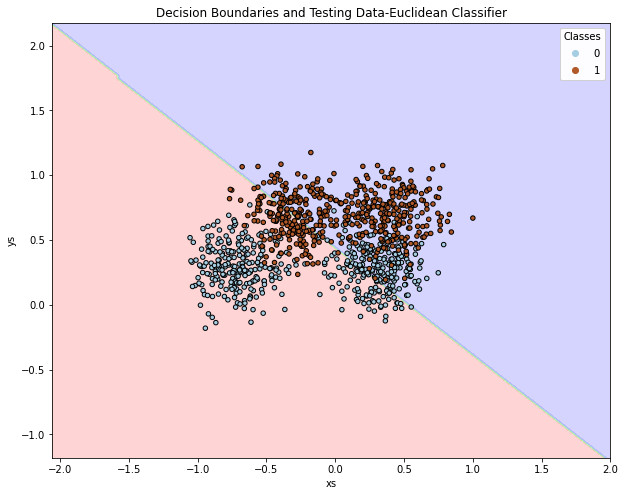

In [26]:
X_test = testing_data[:, :-1]
y_test = testing_data[:, -1]


# Create a larger figure with a specified size
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Create a meshgrid of test points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150), np.linspace(y_min, y_max, 150))
testing_points = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
testing_points_classified = np.array([discriminant1.min_eucl_dist_classifier(row) for row in testing_points]).reshape(xx.shape)

# Create a custom colormap for decision boundaries with different colors
cmap_boundaries = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Create a contour plot for the decision boundaries with transparency
plt.contourf(xx, yy, testing_points_classified, cmap=cmap_boundaries, alpha=0.5)

# Scatter plot of your testing dataset with different colors for different classes
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=20)
legend = plt.legend(*scatter.legend_elements(), title="Classes")

# Add labels and title
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Decision Boundaries and Testing Data-Euclidean Classifier")

# Customize the legend
plt.gca().add_artist(legend)

# Show the plot
plt.show()


\\
\
\
\
**We can see from the figure that the Minimum Euclidean Distance classifier is a hyperplane of 1 dimension as we have 2 dimensions in our training data.**

**It is the least accurate classifier out of all the three classifiers.**

\
\
\
**Minimum Mahalanobis Distance Classifier**

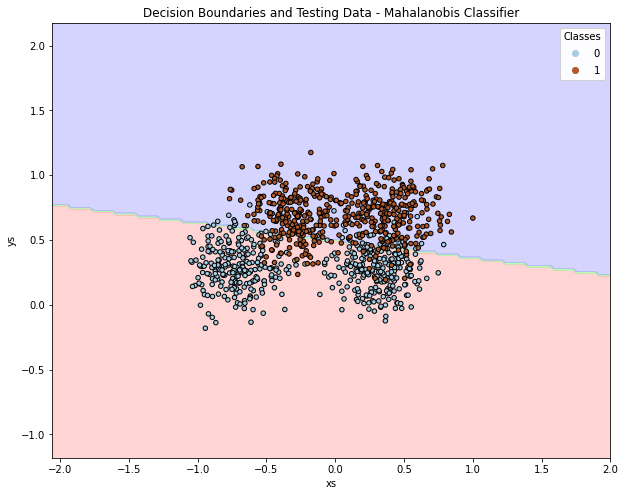

In [25]:
X_test = testing_data[:, :-1]
y_test = testing_data[:, -1]

# Create a larger figure with a specified size
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Create a meshgrid of test points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150), np.linspace(y_min, y_max, 150))
testing_points = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
testing_points_classified = np.array([discriminant1.mah_dist_classifier(row) for row in testing_points]).reshape(xx.shape)

# Create a custom colormap for decision boundaries with different colors
cmap_boundaries = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Create a contour plot for the decision boundaries with transparency
plt.contourf(xx, yy, testing_points_classified, cmap=cmap_boundaries, alpha=0.5)

# Scatter plot of your testing dataset with different colors for different classes
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=20)
legend = plt.legend(*scatter.legend_elements(), title="Classes")

# Add labels and title
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Decision Boundaries and Testing Data - Mahalanobis Classifier")

# Customize the legend
plt.gca().add_artist(legend)

# Show the plot
plt.show()


**We can see that it performs better than Euclidean distance classifier**

**Mahalanobis distance considers the inverse of the covariance matrix, leading to a quadratic term in the discriminant function.**

**As a result, the decision boundary can capture more complex relationships between classes, compared to a linear boundary**

\
\
\
**Arbitrary Distance Classifier**

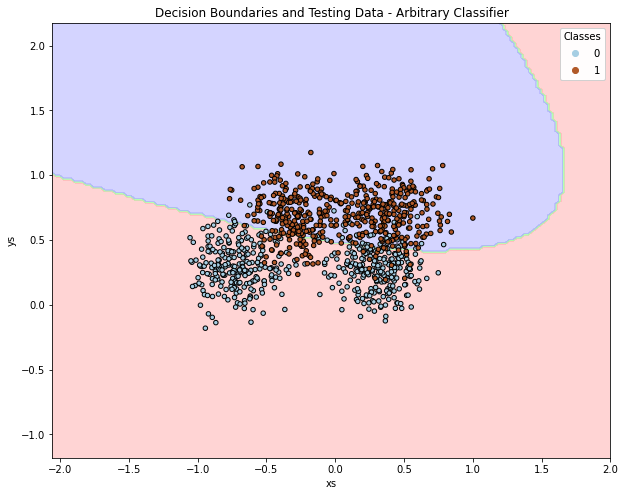

In [24]:
X_test = testing_data[:, :-1]
y_test = testing_data[:, -1]

# Create a larger figure with a specified size
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Create a meshgrid of test points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150), np.linspace(y_min, y_max, 150))
testing_points = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
testing_points_classified = np.array([discriminant1.arbitrary_dist_classifier(row) for row in testing_points]).reshape(xx.shape)

# Create a custom colormap for decision boundaries with different colors
cmap_boundaries = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Create a contour plot for the decision boundaries with transparency
plt.contourf(xx, yy, testing_points_classified, cmap=cmap_boundaries, alpha=0.5)

# Scatter plot of your testing dataset with different colors for different classes
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=20)
legend = plt.legend(*scatter.legend_elements(), title="Classes")

# Add labels and title
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Decision Boundaries and Testing Data - Arbitrary Classifier")

# Customize the legend
plt.gca().add_artist(legend)

# Show the plot
plt.show()


**Arbitrary distance classifier performs better than the previous one**

**Here the decision boundary is non linear which leads to better classification rate**

\
\
\
**kNN Classifier**

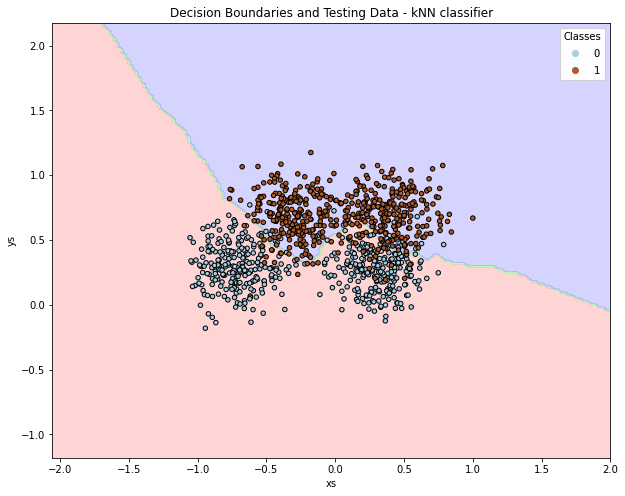

In [27]:
X_test = testing_data[:, :-1]
y_test = testing_data[:, -1]

# Create a larger figure with a specified size
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Create a meshgrid of test points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150), np.linspace(y_min, y_max, 150))
testing_points = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))
testing_points_classified = np.array([knn20.predict(row) for row in testing_points]).reshape(xx.shape)

# Create a custom colormap for decision boundaries with different colors
cmap_boundaries = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Create a contour plot for the decision boundaries with transparency
plt.contourf(xx, yy, testing_points_classified, cmap=cmap_boundaries, alpha=0.5)

# Scatter plot of your testing dataset with different colors for different classes
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=20)
legend = plt.legend(*scatter.legend_elements(), title="Classes")

# Add labels and title
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Decision Boundaries and Testing Data - kNN classifier")

# Customize the legend
plt.gca().add_artist(legend)

# Show the plot
plt.show()


**kNN performs the best**

**We can see that the shape is neither linear nor a parabola but considers the density of the points in the surrounding**




### (5 pts) Final discussion.

**Overall, I enjoyed working on the project.**

**If we increase the k in kNN, we would get better accuracy than all the three discriminant functions, but that is not how it is supposed to be.**

**We can study where to stop for the value of k**

**Also, I would like to study further how considering the covariance matrix can add to the complexity without adding much to the accuracy of the classifier**